# Mlflow

# Часть 1. EDA, Часть 2. Preprocessing & Feature Engineering

### на примере датасета оттока клиентов. данные можно скачать тут: https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,classification_report, precision_score, recall_score, f1_score
import mlflow


%matplotlib inline
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


проверка на дубликаты

In [4]:
data[data.duplicated(['customerID'], keep=False)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [8]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


проверим на пропуски

In [9]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

удалим лишнюю колонку

In [10]:
data.drop(columns=['customerID'], inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018D3B982C48>,
      dtype=object)

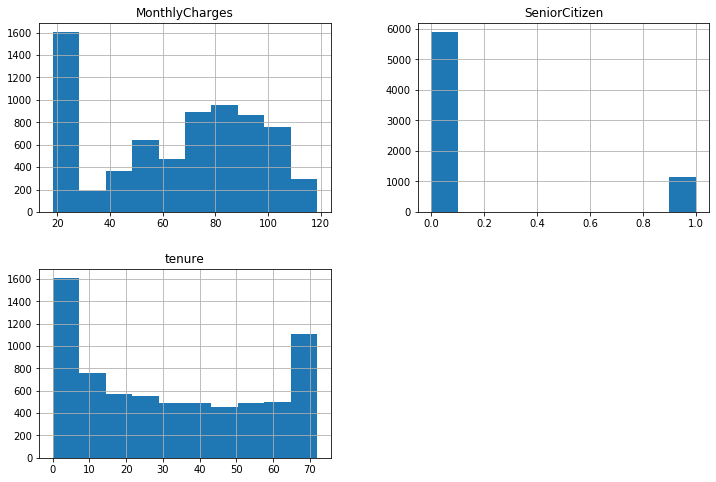

In [11]:
data.hist()

### Target: Churn

Text(0.5, 1.0, 'Распределение оттока клиентов')

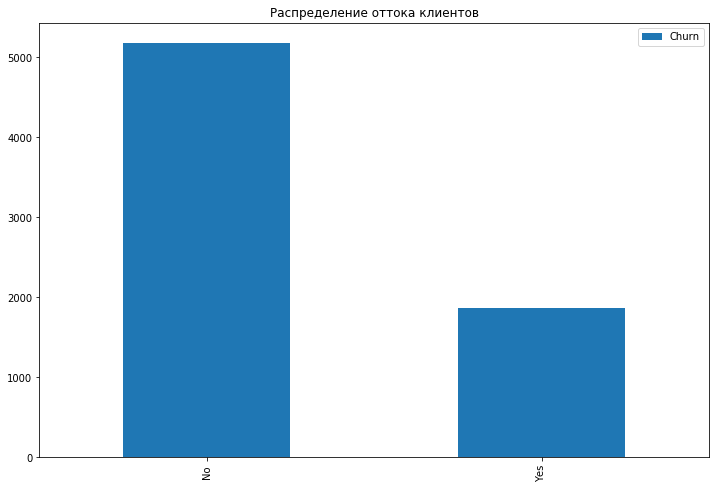

In [12]:
data['Churn'].value_counts().plot(kind='bar', label='Churn').legend()
plt.title('Распределение оттока клиентов')

оцифруем целевую переменную

In [13]:
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

### gender 

In [14]:
data.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

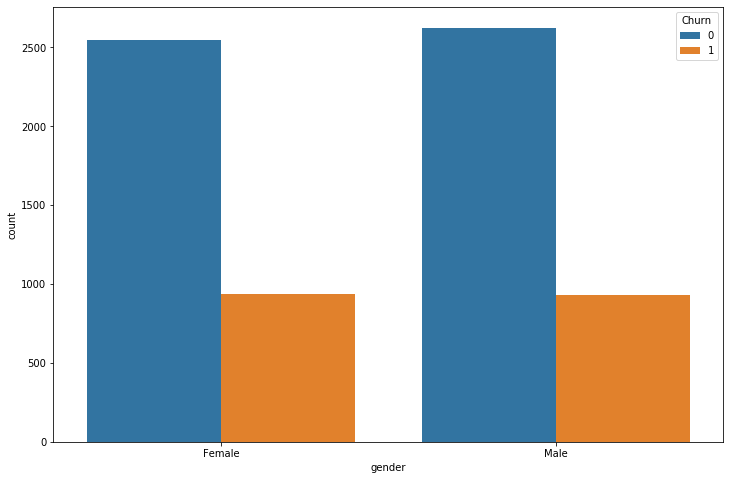

In [15]:
sns.countplot(x='gender', hue='Churn', data=data);

закодируем, используя label encoder. Его т.к. будем работать с "деревянными" моделями

In [16]:
le = LabelEncoder()

In [17]:
data.gender = le.fit_transform(data.gender)

### SeniorCitizen

In [18]:
data.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

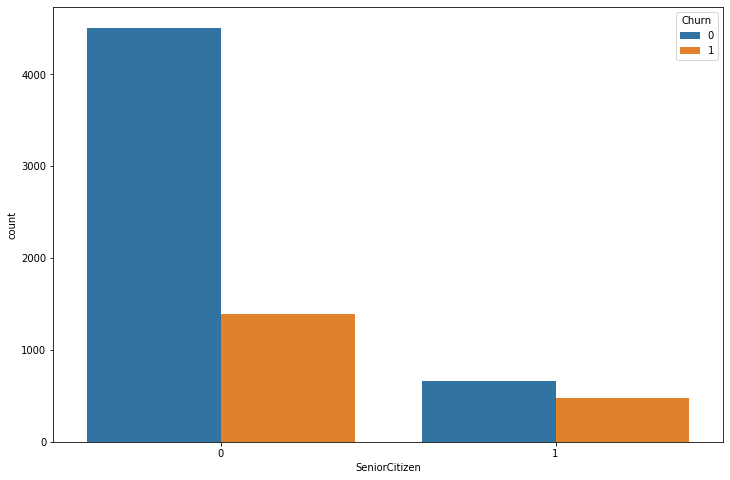

In [19]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=data);

In [20]:
data.SeniorCitizen = le.fit_transform(data.SeniorCitizen)

### Partneer

In [21]:
data.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

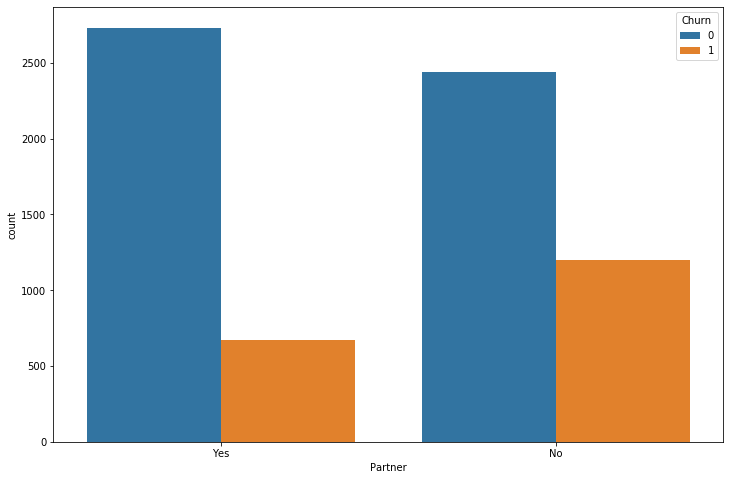

In [22]:
sns.countplot(x='Partner', hue='Churn', data=data);

интересный признак, люди без партнера чаще уходят от оператора, возможно это связано с тем, что одному проще сменить оператора. В паре нужно менять всем,т.к. звонки между одним и тем же оператором - дешевле

In [23]:
data.Partner = le.fit_transform(data.Partner)

### Dependents

In [24]:
data.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

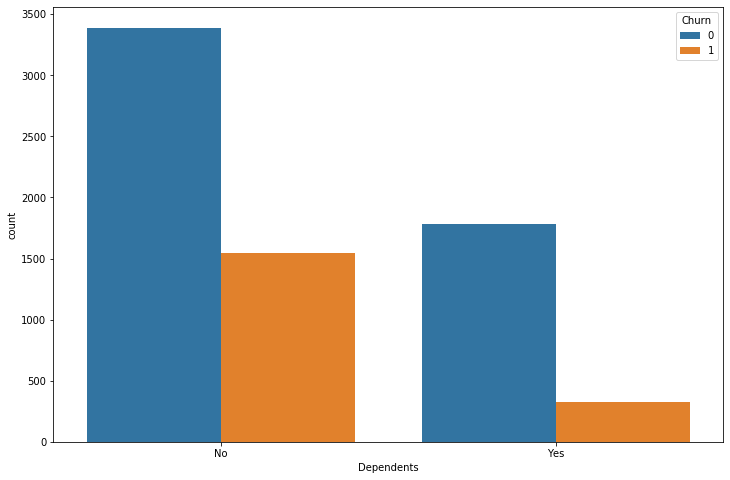

In [25]:
sns.countplot(x='Dependents', hue='Churn', data=data);

клиенты без иждивенцев чаще уходят

In [26]:
data.Dependents = le.fit_transform(data.Dependents)

### tenure

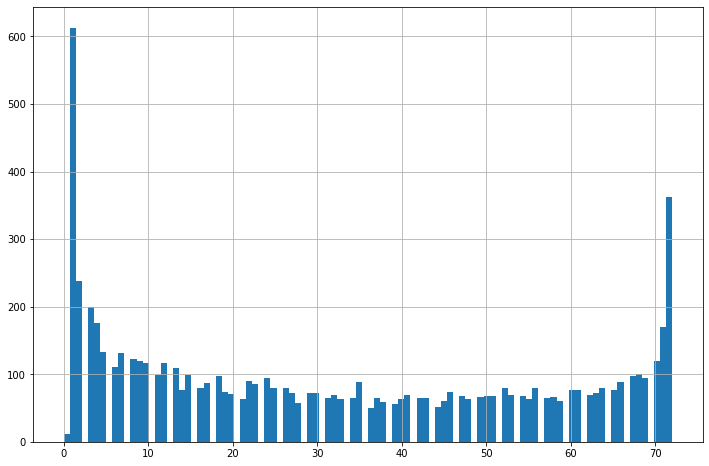

In [27]:
data.tenure.hist(bins = 100)

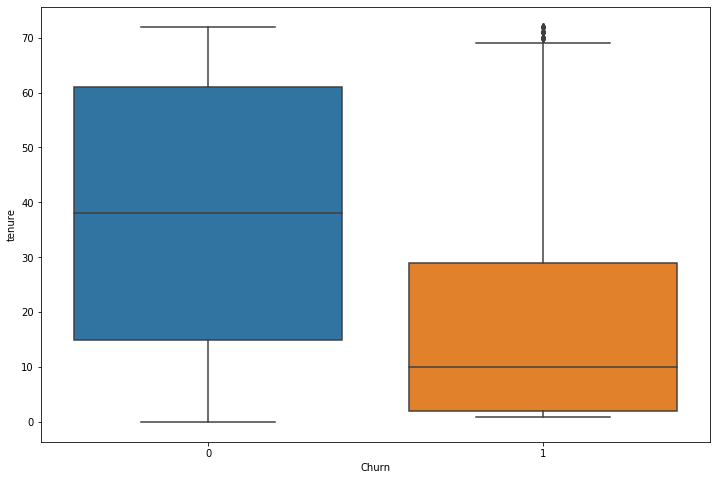

In [28]:
sns.boxplot(x='Churn', y='tenure', data=data)

видим, что иим что уходящие пользуются связью не так долго как постоянные клиенты

### PhoneService

In [29]:
data.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

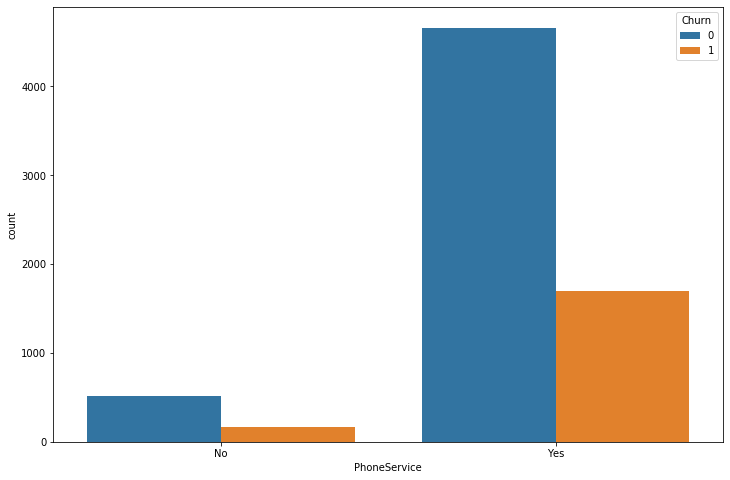

In [30]:
sns.countplot(x='PhoneService', hue='Churn', data=data);

In [31]:
data.PhoneService = le.fit_transform(data.PhoneService)

### MultipleLines

In [32]:
data.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

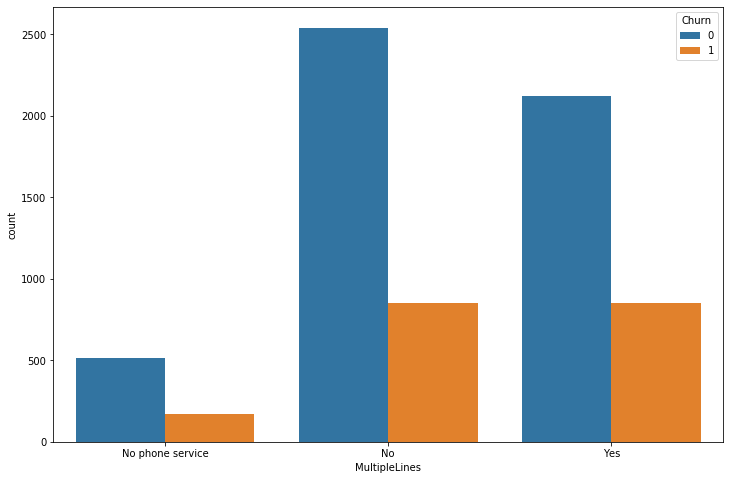

In [33]:
sns.countplot(x='MultipleLines', hue='Churn', data=data);

In [34]:
data.MultipleLines = le.fit_transform(data.MultipleLines)

### InternetService

In [35]:
data.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

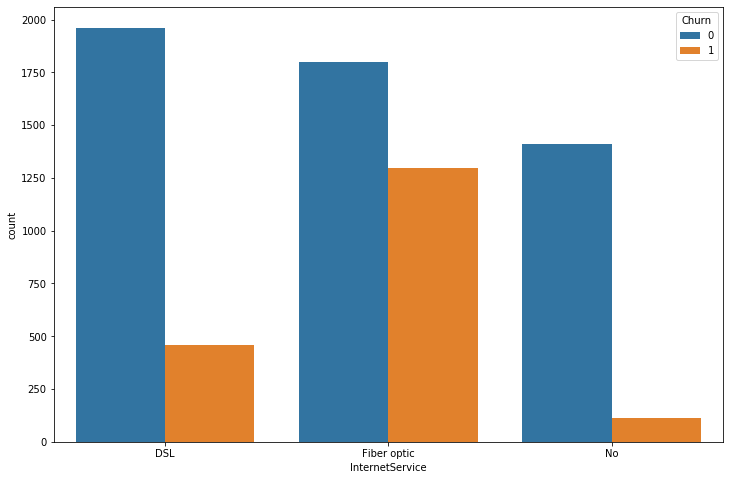

In [36]:
sns.countplot(x='InternetService', hue='Churn', data=data);

интересное замечание, клиенты с оптоволокном лидируют по оттоку..

In [37]:
data.InternetService = le.fit_transform(data.InternetService)

### OnlineSecurity

In [38]:
data.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

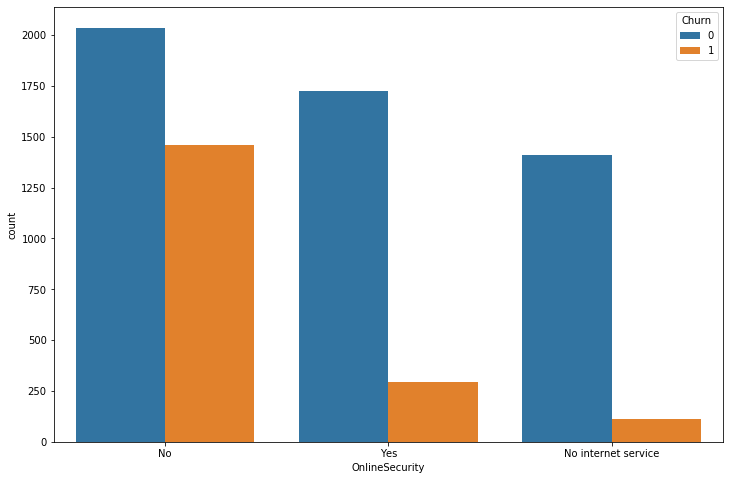

In [39]:
sns.countplot(x='OnlineSecurity', hue='Churn', data=data);

In [40]:
data.OnlineSecurity = le.fit_transform(data.OnlineSecurity)

### OnlineBackup

In [41]:
data.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

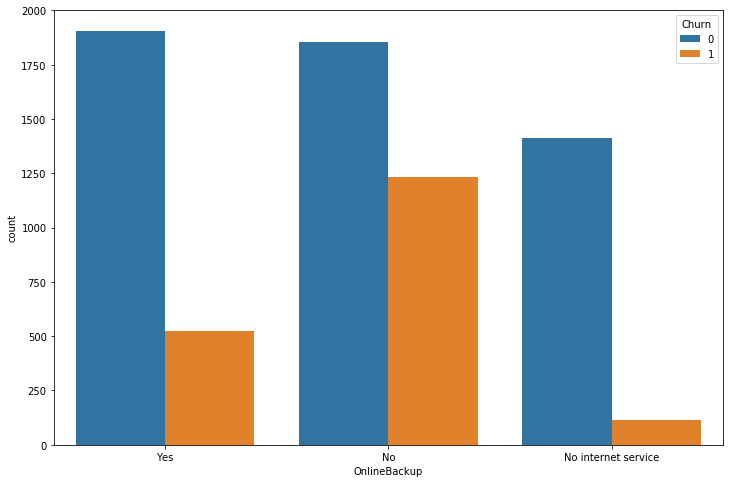

In [42]:
sns.countplot(x='OnlineBackup', hue='Churn', data=data);

In [43]:
data.OnlineBackup = le.fit_transform(data.OnlineBackup)

### DeviceProtection

In [44]:
data.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

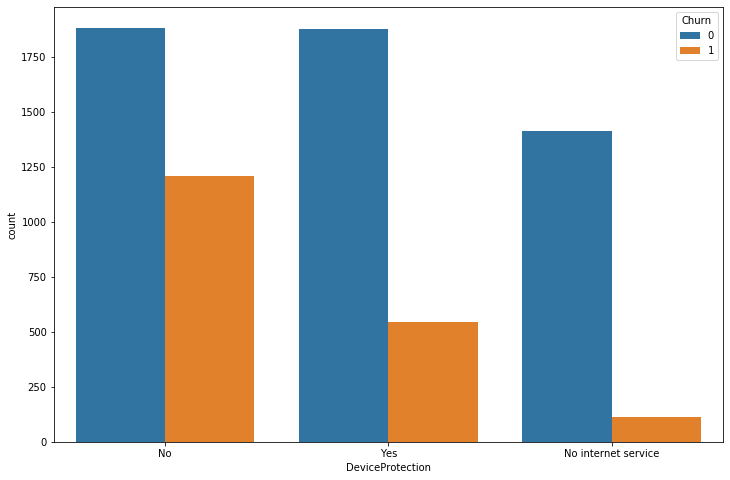

In [45]:
sns.countplot(x='DeviceProtection', hue='Churn', data=data);

In [46]:
data.DeviceProtection = le.fit_transform(data.DeviceProtection)

### TechSupport

In [47]:
data.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

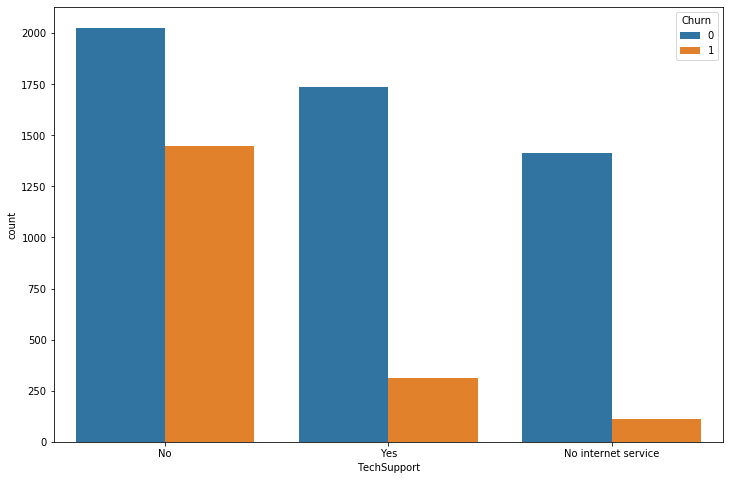

In [48]:
sns.countplot(x='TechSupport', hue='Churn', data=data);

In [49]:
data.TechSupport = le.fit_transform(data.TechSupport)

### StreamingTV

In [50]:
data.StreamingTV.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

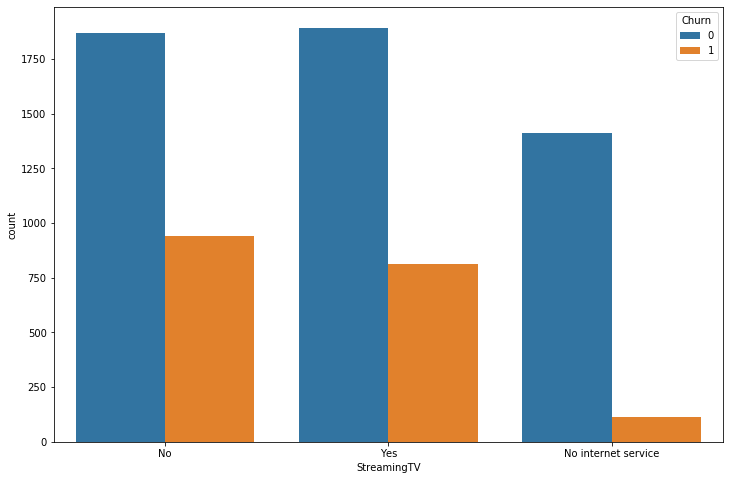

In [51]:
sns.countplot(x='StreamingTV', hue='Churn', data=data);

In [52]:
data.StreamingTV = le.fit_transform(data.StreamingTV)

### StreamingMovies

In [53]:
data.StreamingMovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

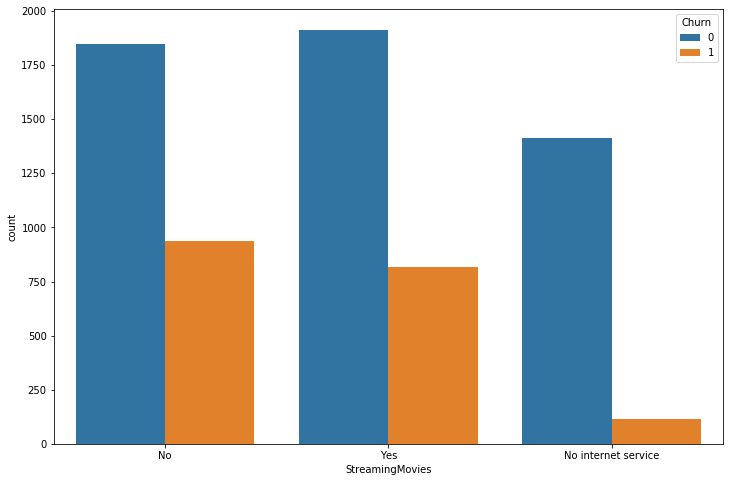

In [54]:
sns.countplot(x='StreamingMovies', hue='Churn', data=data);

In [55]:
data.StreamingMovies = le.fit_transform(data.StreamingMovies)

In [56]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,One year,No,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,1


### Contract

In [57]:
data.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

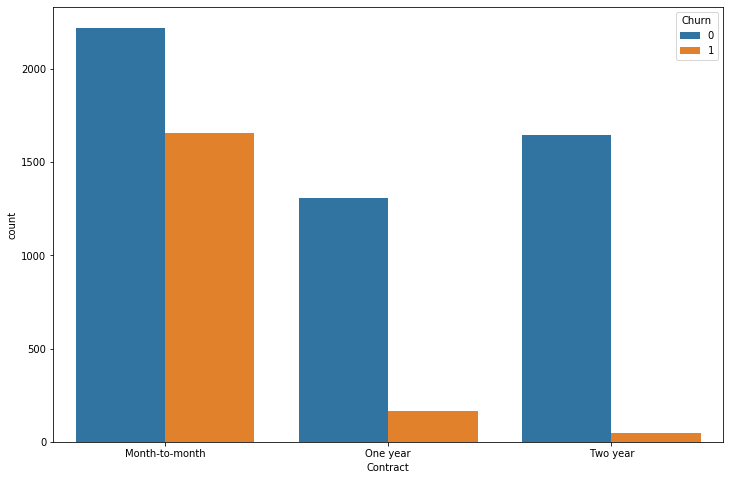

In [58]:
sns.countplot(x='Contract', hue='Churn', data=data);

крутой признак, месячники уходят чаще

In [59]:
data.Contract = le.fit_transform(data.Contract)

### PaperlessBilling

In [60]:
data.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

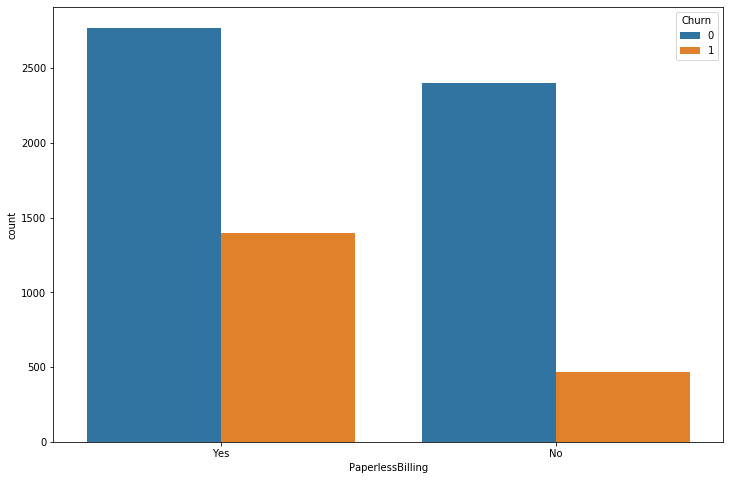

In [61]:
sns.countplot(x='PaperlessBilling', hue='Churn', data=data);

In [62]:
data.PaperlessBilling = le.fit_transform(data.PaperlessBilling)

### PaymentMethod

In [63]:
data.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

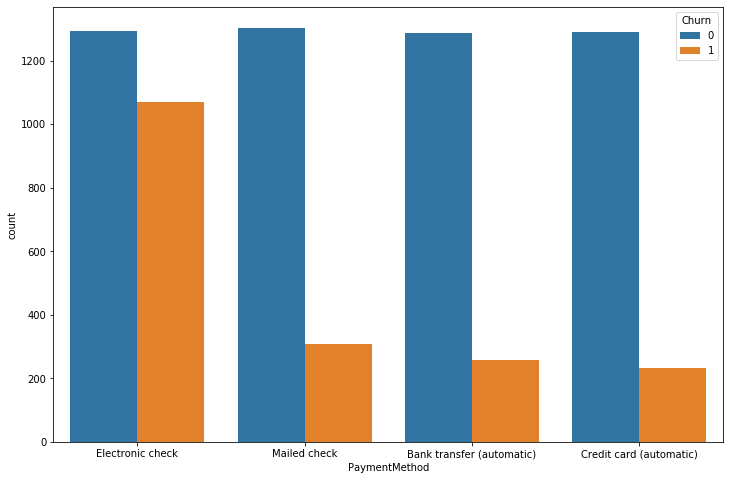

In [64]:
sns.countplot(x='PaymentMethod', hue='Churn', data=data);

электронные чеки это плохо...

In [65]:
data.PaymentMethod = le.fit_transform(data.PaymentMethod)

In [66]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### MonthlyCharges	TotalCharges

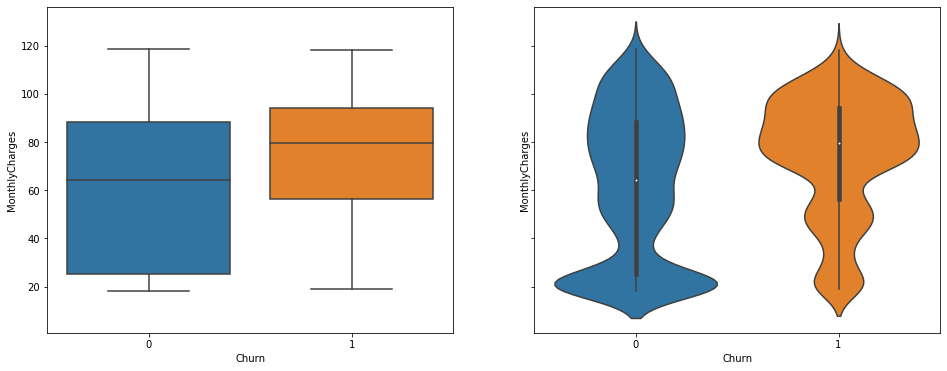

In [67]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.boxplot(x='Churn', y='MonthlyCharges', data=data, ax=axes[0]);
sns.violinplot(x='Churn', y='MonthlyCharges', data=data, ax=axes[1]);

преобразуем total_charges во float

In [68]:
data['TotalCharges'] 

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [69]:
data[data['TotalCharges'].str.match(' ') == False]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.5,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.9,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.6,1


In [70]:
data['TotalCharges'] = data['TotalCharges'].apply(lambda x: 0 if x == ' ' else x)

In [71]:
data[data['TotalCharges'] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,0,0,1,1,0,0,1,0,2,0,2,2,2,0,2,1,0,52.55,0,0
753,1,0,0,1,0,1,0,2,1,1,1,1,1,1,2,0,3,20.25,0,0
936,0,0,1,1,0,1,0,0,2,2,2,0,2,2,2,0,3,80.85,0,0
1082,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.75,0,0
1340,0,0,1,1,0,0,1,0,2,2,2,2,2,0,2,0,1,56.05,0,0
3331,1,0,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,19.85,0,0
3826,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.35,0,0
4380,0,0,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,20.00,0,0
5218,1,0,1,1,0,1,0,2,1,1,1,1,1,1,1,1,3,19.70,0,0
6670,0,0,1,1,0,1,2,0,0,2,2,2,2,0,2,0,3,73.35,0,0


In [72]:
data['TotalCharges'] = data['TotalCharges'].astype('float64')

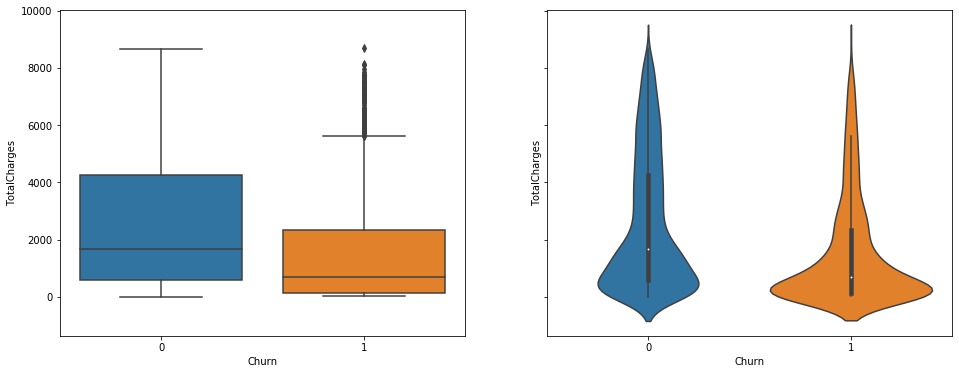

In [73]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.boxplot(x='Churn', y='TotalCharges', data=data, ax=axes[0]);
sns.violinplot(x='Churn', y='TotalCharges', data=data, ax=axes[1]);

In [74]:
data.TotalCharges.corr(data.MonthlyCharges)

0.651173831578784

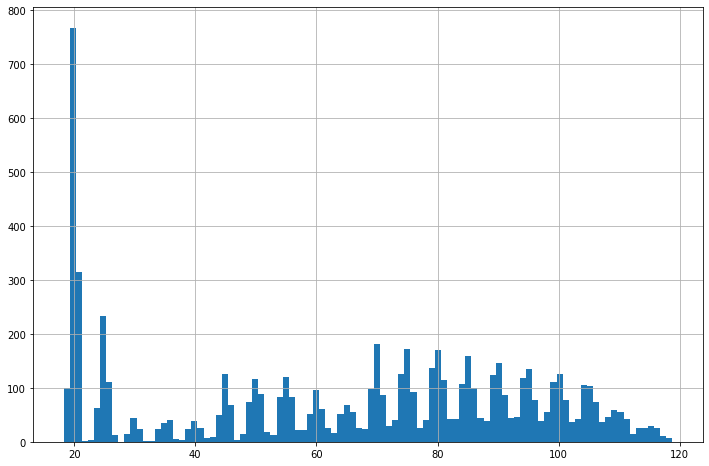

In [75]:
data.MonthlyCharges.hist(bins = 100)

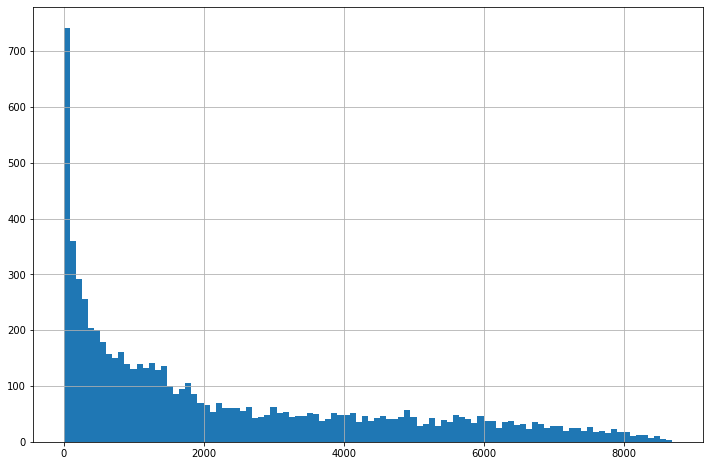

In [76]:
data.TotalCharges.hist(bins = 100)

In [77]:
corr_matrix = data.corr()

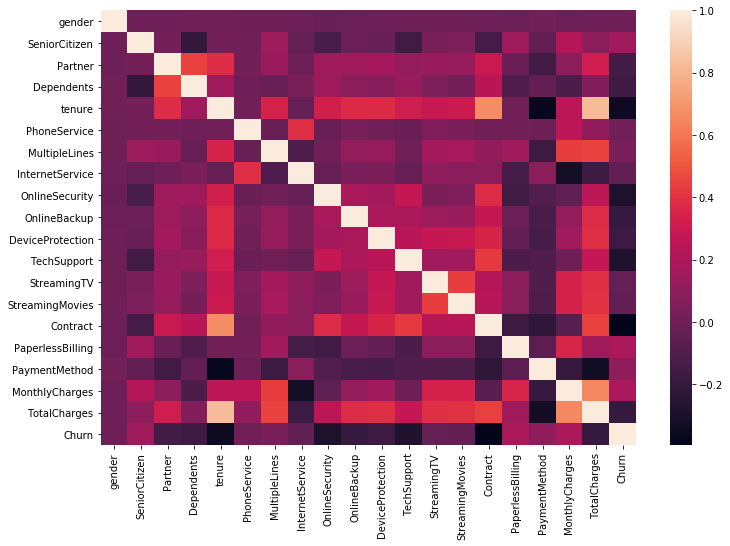

In [78]:
sns.heatmap(corr_matrix);

# Часть 3. MLFlow

### классический метод оценки модели

функция качества модели

In [80]:
def quality(prediction_y, true_y):
    accuracy = accuracy_score(prediction_y, true_y)
    precision = precision_score(prediction_y, true_y)
    recall = recall_score(prediction_y, true_y)
    f1 = f1_score(prediction_y, true_y)
    print("Accuracy:  {:.3f}\nPrecision: {:.3f}\nRecall:    {:.3f}\nF1-score:  {:.3f}".format(
        accuracy, precision, recall, f1
    ))

функция построения кривой roc_auc

In [81]:

def plot_roc_curve(prob_prediction, actual):
    fpr, tpr, thresholds = roc_curve(y_test, prob_prediction)
    auc_score = roc_auc_score(y_test, prob_prediction)
    
    plt.plot(fpr, tpr, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC: {:.3f}'.format(auc_score))
    plt.show()

### sklearn RandomForest

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Churn'], axis = 1), data.Churn, test_size=0.3, random_state=2021, stratify=data.Churn.values)

In [83]:
clfRF = RandomForestClassifier(random_state=2021)
clfRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2021,
                       verbose=0, warm_start=False)

In [84]:
predRF = clfRF.predict(X_test)

In [85]:
print("Train quality:")
quality(clfRF.predict(X_train), y_train)
print("\nTest quality:")
quality(predRF, y_test)

Train quality:
Accuracy:  0.981
Precision: 0.937
Recall:    0.989
F1-score:  0.962

Test quality:
Accuracy:  0.779
Precision: 0.446
Recall:    0.616
F1-score:  0.517


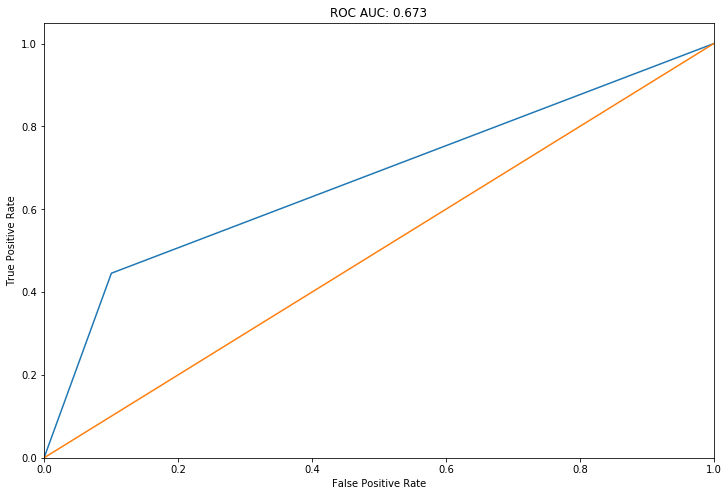

In [86]:
plot_roc_curve(predRF, y_test)



*   без настроек гимперпараметров победила модель XGBOOST auc = 0,717, 2 место - GradientBoosting от sklearn auc = 0,711 (если смотреть по метрике ROC_AUC)
*   с настройками гиперпараметров на кросс валидации победила также модель LightGBM auc = 0,708, 2 место XGBOOST auc = 0,705.

P.S.: добавил реализацию градиентного бустинга от sklearn + не стал удалять пропуски, в total_charge, заменив их 0.




### Метод MLFlow

In [87]:
#создаем локальный сервер mlflow

mlflow.set_tracking_uri(r"file///C:/Users/папка назначения локального сервера")

после инициализации mlflow можно в командной строке командой "mlflow ui" запустить user interface локально. Далее по адресу http://127.0.0.1:5000 открыть интерфейс

In [88]:
# данные одного эксперимента
experiment_id = 1
n_estimators = 100
max_depth = 3
max_features = 7

In [89]:
# запускаем эксперимент
experiment_id = mlflow.create_experiment("training experiment_1")
with mlflow.start_run(experiment_id=experiment_id):
                model = RandomForestClassifier (n_estimators=n_estimators,
                max_depth=max_depth,
                max_features=max_features, n_jobs=-1,)
                model.fit(X_train,y_train)
                y_pred = model.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred)
                recall = recall_score(y_test, y_pred)
                f1 = f1_score(y_test, y_pred)
                auc = roc_auc_score(y_test, y_pred)
                mlflow.log_param("n_estimators",n_estimators)
mlflow.log_param("n_estimators",n_estimators)
mlflow.log_param("max_depth",max_depth)
mlflow.log_param("max_features",max_features)
mlflow.log_metric("accuracy",accuracy)
mlflow.log_metric("precision",precision )
mlflow.log_metric("recall",recall )
mlflow.log_metric("f1",f1 )
mlflow.log_metric("auc",auc )
mlflow.sklearn.log_model(model,"model")
mlflow.end_run()

после отработки эксперимента 1, обновляем http://127.0.0.1:5000 и изучаем метрики нашей модели, далее аналогично запускаем эксперименты 2,3,и т.д. с различными гиперпараметрами.
Находим модель с наилучшими результатами.